In [1]:
import os 
import cv2 
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score


In [2]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install graphviz

In [4]:
train_path = r"C:\Users\semih\Desktop\brain\train"
test_path = r"C:\Users\semih\Desktop\brain\test"
val_path = r"C:\Users\semih\Desktop\brain\val"

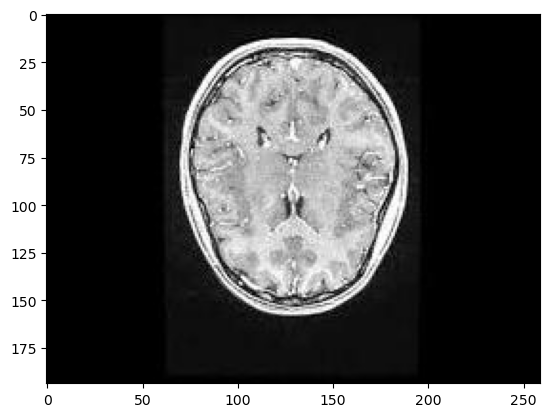

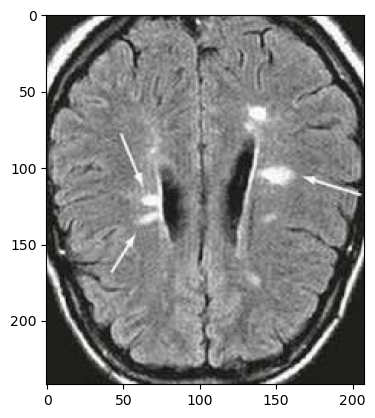

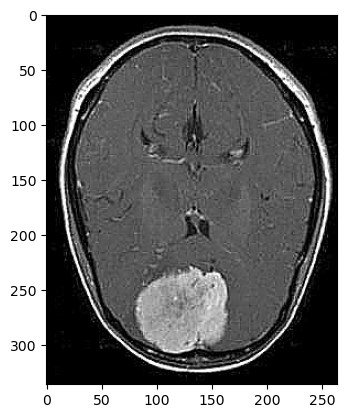

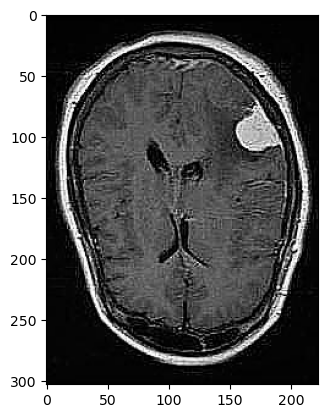

In [5]:
for folder in os.listdir(train_path):  #sınıflarımı görmek için
    sub_path = train_path + "/" + folder
    
    for i in range(2):     #eğitimiz verimizin alt sınıflarından ikişer adet görsel
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        implot = plt.imshow(img)
        plt.show()

In [6]:
def imagearray(path, size): #bütün görüntüleri boyutlandırmak için fonk
    data = []
    for folder in os.listdir(path):
        sub_path = path + "/" + folder
        
        for img in os.listdir(sub_path):
            image_path = sub_path + "/" + img
            img_arr = cv2.imread(image_path)
            img_arr = cv2.resize(img_arr , size)
            data.append(img_arr)
    return data       

In [7]:
size = (250,250)

In [8]:
train = imagearray(train_path , size)
test = imagearray(test_path , size)
val = imagearray(val_path , size)

In [9]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [10]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [11]:
def data_class(data_path , size , class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path ,
                                        target_size = size,
                                         batch_size = 32,
                                         class_mode = class_mode)
    return classes

In [12]:
train_class = data_class(train_path , size , "sparse")
test_class = data_class(test_path , size , "sparse")
val_class = data_class(val_path , size , "sparse")

Found 2099 images belonging to 2 classes.
Found 602 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [13]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [14]:
train_class.classes

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
train_class.class_indices

{'no': 0, 'yes': 1}

In [16]:
vgg = VGG19(input_shape = (250,250,3), weights = "imagenet", include_top=False)

In [17]:
for layer in vgg.layers:
    layer.trainable = False

In [18]:
x =Flatten()(vgg.output)
prediction = Dense(2,activation = "softmax")(x)

In [19]:
model =Model(inputs=vgg.input , outputs = prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 250, 250, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 250, 250, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 125, 125, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 62, 62, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [20]:
early_stop = EarlyStopping(monitor = "val_loss" , mode="min", verbose=1 ,patience = 5)

In [21]:
model.compile(loss = "sparse_categorical_crossentropy",
            optimizer = "adam",
            metrics = ["accuracy"])


In [22]:
history=model.fit(x_train , y_train,
         validation_data = (x_val,y_val),
         epochs=10,
         callbacks =[early_stop],
         batch_size = 10,
         shuffle = True)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1084s 5s/step - accuracy: 0.7796 - loss: 0.6919 - val_accuracy: 0.8967 - val_loss: 0.2406
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1036s 5s/step - accuracy: 0.9521 - loss: 0.1114 - val_accuracy: 0.9367 - val_loss: 0.1835
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1020s 5s/step - accuracy: 0.9813 - loss: 0.0523 - val_accuracy: 0.9067 - val_loss: 0.2837
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1035s 5s/step - accuracy: 0.9966 - loss: 0.0228 - val_accuracy: 0.9000 - val_loss: 0.2859
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1021s 5s/step - accuracy: 0.9974 - loss: 0.0131 - val_accuracy: 0.9167 - val_loss: 0.2015
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 936s 4s/step - accuracy: 0.9993 - loss: 0.0115 - val_accuracy: 0.9467 - val_loss: 0.1529
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 941s 4s/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.8667 - val_loss: 0.4864
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 999s 5s/step - accuracy: 1.0000 - loss: 0.0060 - val

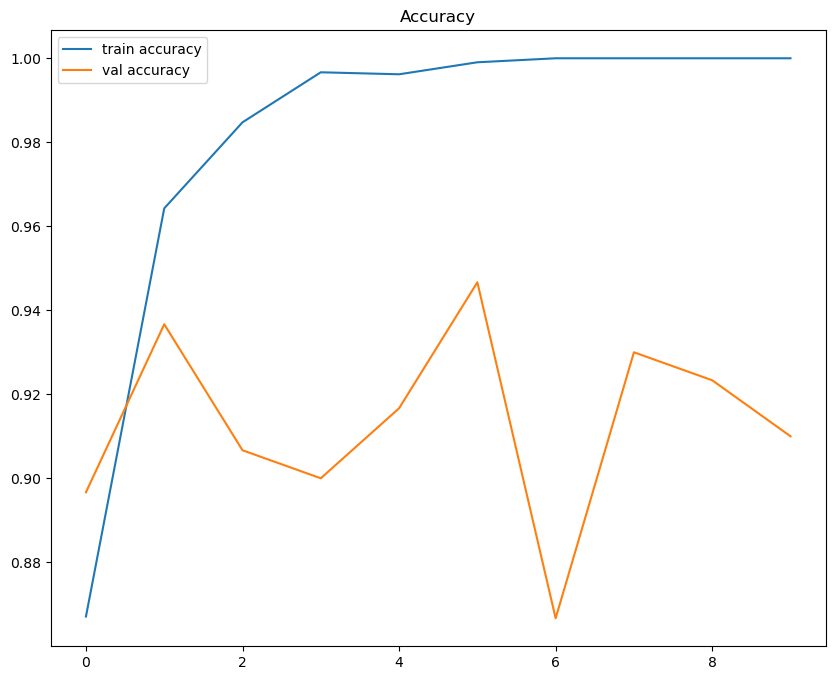

In [23]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

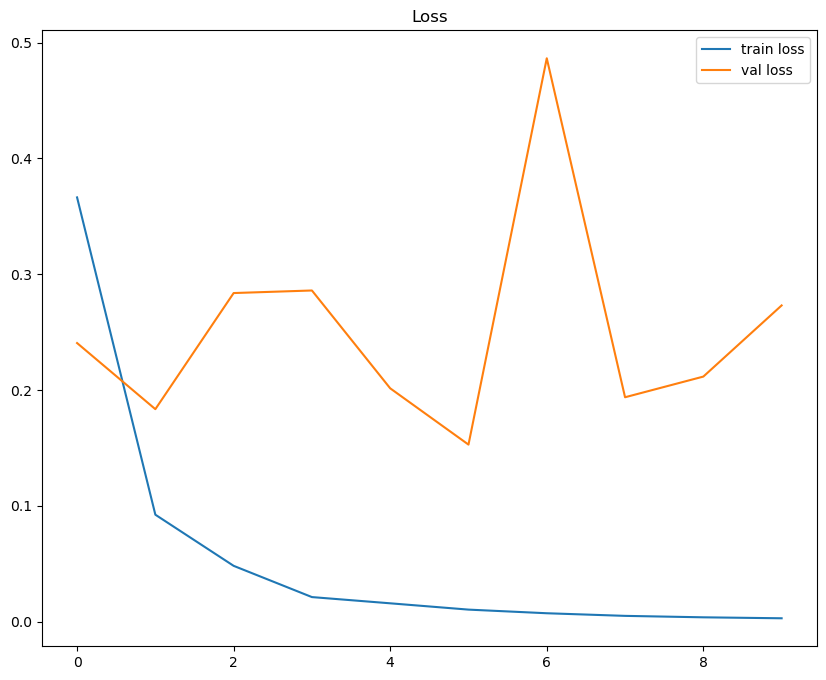

In [24]:
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"], label = "train loss")
plt.plot(history.history["val_loss"], label = "val loss")
plt.legend()
plt.title("Loss")
plt.show()

In [25]:
model.evaluate(x_test, y_test, batch_size=32)

19/19 ━━━━━━━━━━━━━━━━━━━━ 319s 17s/step - accuracy: 0.8297 - loss: 0.4847


[0.33114567399024963, 0.8853820562362671]

In [26]:
y_pred = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 337s 18s/step


In [27]:
y_pred=np.argmax(y_pred,axis=1)

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       254
           1       0.96      0.83      0.89       348

    accuracy                           0.89       602
   macro avg       0.89      0.90      0.88       602
weighted avg       0.90      0.89      0.89       602



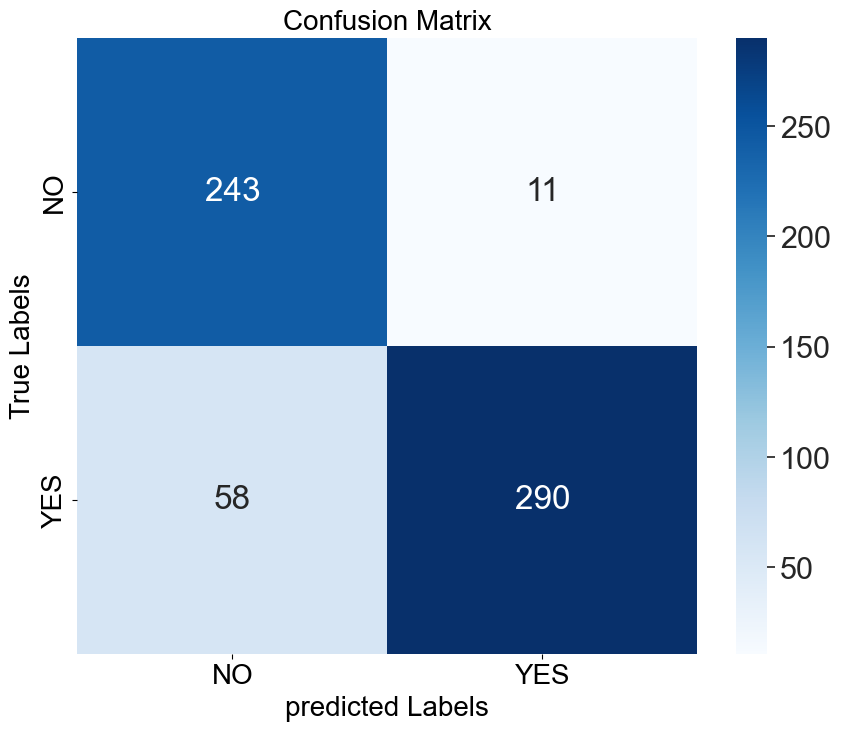

In [30]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,8))
ax=plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True , fmt="g" , cmap="Blues" , ax=ax);
ax.set_xlabel("predicted Labels" , fontsize=20); ax.set_ylabel("True Labels", fontsize=20);
ax.set_title('Confusion Matrix', fontsize = 20);
ax.xaxis.set_ticklabels(["NO" , "YES"], fontsize=20); ax.yaxis.set_ticklabels(["NO" , "YES"], fontsize=20);

In [31]:
f1_score(y_test , y_pred , average="micro")

0.8853820598006644

In [32]:
recall_score(y_test, y_pred ,average="weighted")

0.8853820598006644

In [33]:
precision_score(y_test , y_pred,average="micro")

0.8853820598006644